Linear regression models the relationship between a single, continuous-valued target $\left(y^{(i)}\right)$ and some number of features $\left(x_1^{(i)}, x_2^{(i)}, \ldots, x_m^{(i)}\right)$ as follows:
$$
y^{(i)} = w_1x_1^{(i)}+w_2x_2^{(i)}+\dots+w_mx_m^{(i)}+b = \sum_{j=1}^m w_jx_j^{(i)} + b = \mathbf{w}^\top\mathbf{x}^{(i)} + b.
$$

The goal is to learn the weights $\mathbf{w}$ and bias $b$ which best fit the training data, creating a hyperplane in $m$ dimensions that nearly interpolates the training examples. Specifically, we aim to minimize the aggregated vertical distances between the training examples and the fitted hyperplane; we call these vertical distances *residuals*.

We will use a subset of the features in the Ames Housing dataset to illustrate linear regression.

In [2]:
import pandas as pd

#load in subset of Ames features
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']
df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', sep='\t', usecols=columns)
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [3]:
#make Central Air a column of 1s and 0s
df['Central Air'] = df['Central Air'].map({'Y':1, 'N':0})

#check for missing values
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

Because there is only one row containing a missing value, we can simply remove this row.

In [4]:
#drop row containing null value
df.dropna(axis=0, inplace=True)

In order to visualize the pair-wise correlations between the different features, we will create a scatterplot matrix. We use the `scatterplotmatrix` function from the `mlxtend` library.

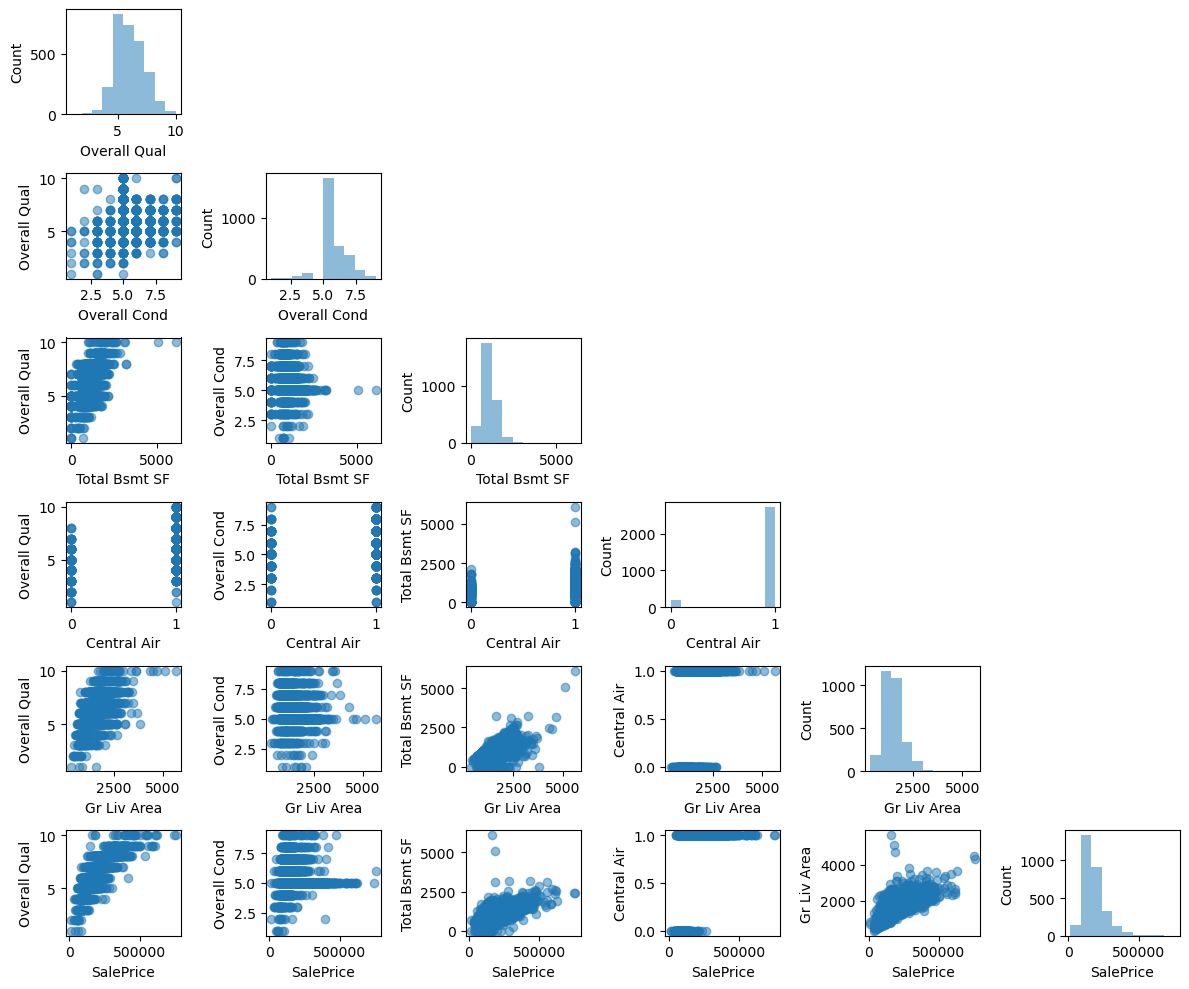

In [5]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

#create scatterplot matrix
scatterplotmatrix(df.values, figsize=(12, 10), names=df.columns, alpha=0.5)
plt.tight_layout()
plt.show()

We can also create a correlation matrix to quantify the pairwise correlations between features. To do so, we calculate the Pearson product-moment correlation coefficient $r$ for each pair of features, which measures the linear dependence between two features. The values of this coefficient are in the range $[-1, 1]$, where two perfectly positively correlated features yield $r=1$ and two perfectly negatively correlated features yield $r=-1$, whereas two features which are completely uncorrelated yield $r=0$.

To calculate Pearson's correlation coefficient, we simply divide the covariance between the two features in question, say $x$ and $y$, by the product of their respective standard deviations:
$$
r = \frac{\operatorname{Cov}(x, y)}{\sigma_x\sigma_y} = \frac{\sum_{i=1}^n \left[\left(x^{(i)}-\mu_x\right)\left(y^{(i)}-\mu_y\right) \right]}{\sqrt{\sum_{i=1}^n \left(x^{(i)}-\mu_x\right)^2}\sqrt{\sum_{i=1}^n \left(y^{(i)}-\mu_y\right)^2}}.
$$

In fact, the correlation matrix is simply a covariance matrix computed from standardized features. To see this,...

To visualize the correlation matrix, we can use the `corrcoef` function in the NumPy library combined with the `heatmap` function from the `mlxtend` library.

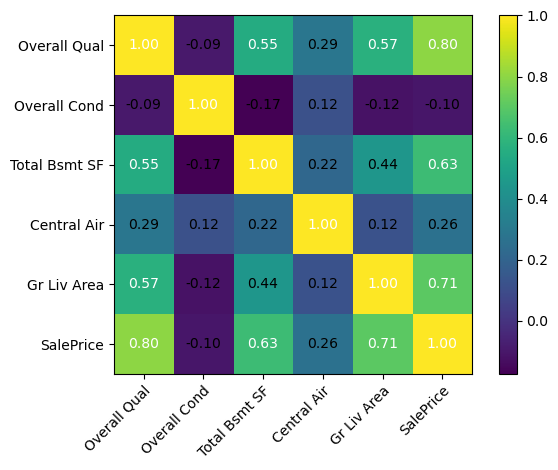

In [6]:
import numpy as np
from mlxtend.plotting import heatmap

#create correlation matrix
cm = np.corrcoef(df.values.T)

#display plot of heatmap made from correlation matrix
hm = heatmap(cm, row_names=df.columns, column_names=df.columns)
plt.tight_layout()
plt.show()

We observe that the largest correlation is between the features `SalePrice` and `Overall Qual`, as they have a correlation coefficient of $r=0.80$.

In [6]:
#separate target vector from features
X = df.drop(columns=['SalePrice'])
y = df.SalePrice

Suppose we have the feature set $(X_1, X_2,\ldots, X_m)$ with $m$ features and $N$ training examples. Now, define $\mathbf{X}$ to be the $N\times (m+1)$ matrix which includes all the features of $\mathbf{X}$ and a column vector of ones as its last column, so each row is an input vector with a one in the last position. This allows us to account for the bias $b$ as well as the weights $w_1, w_2,\ldots, w_m$. Similarly, let $\mathbf{y}$ be the vector of targets of length $N$. Then, we can write the multiple regression problem as
$$
\mathbf{y} = \mathbf{X}\mathbf{W} + \epsilon,
$$
where $\epsilon$ represents irreducible variance. To determine the optimal $\mathbf{W}$, we derive the least squares equations by minimizing the $L^2$ or Euclidean norm of the residuals, i.e.
\begin{align*}
\left\lVert \mathbf{y}-\mathbf{X}\mathbf{W} \right\rVert_2^2 &= \left(\mathbf{y}-\mathbf{X}\mathbf{W}\right)^\top \left(\mathbf{y}-\mathbf{X}\mathbf{W}\right) \\
&= \mathbf{y}^\top \mathbf{y} - 2\mathbf{y}^\top \mathbf{X}\mathbf{W} + \mathbf{W}^\top\mathbf{X}^\top \mathbf{X}\mathbf{W}.
\end{align*}

To minimize this quantity, we first take the gradient with respect to $\mathbf{W}$ to get
\begin{align*}
\nabla_\mathbf{W}\left(\mathbf{y}^\top \mathbf{y} - 2\mathbf{y}^\top \mathbf{X}\mathbf{W} + \mathbf{W}^\top\mathbf{X}^\top \mathbf{X}\mathbf{W} \right) &= \nabla_\mathbf{W}\mathbf{y}^\top \mathbf{y} - \nabla_\mathbf{W}2\mathbf{y}^\top \mathbf{X}\mathbf{W} + \nabla_\mathbf{W}\mathbf{W}^\top\mathbf{X}^\top \mathbf{X}\mathbf{W} \\
&= -2\mathbf{X}^\top\mathbf{y} + 2\mathbf{X}^\top \mathbf{X}\mathbf{W}.
\end{align*}

Setting this last expression equal to zero and solving for $\mathbf{W}$ gives the normal equations
$$
\mathbf{W} = \left(\mathbf{X}^\top \mathbf{X} \right)^{-1}\mathbf{X}^\top\mathbf{y}.
$$

We can implement this in Python as follows:

In [7]:
#add a column vector of ones to the feature set
Xt = np.hstack((X, np.ones((X.shape[0], 1))))

#calculate optimal weight matrix
z = np.linalg.inv(np.dot(Xt.T, Xt))
w = np.dot(z, np.dot(Xt.T, y))

#create prediction matrix
weights = w[:-1]
bias = w[-1:]
y_pred = X @ weights + bias

In [8]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#print out MSE, MAE, R^2
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
print('MSE: {}'.format(round(mse, 3)))
print('MAE: {}'.format(round(mae, 3)))
print('R^2: {}'.format(round(r2, 3)))

MSE: 1499345498.078
MAE: 25689.686
R^2: 0.765


However, for larger datasets, the closed-form solution is very expensive to compute (specifically, inverting the  matrix in the formula above requires a large amount of computation). What's more, the feature matrix $\mathbf{X}$ could be singular, in which case this matrix inversion is impossible. So, we often prefer to approximate the weights via optimization algorithms, such as gradient descent. We implement this below:

In [10]:
class LinearRegressionGD:
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.array([0.])
        self.losses_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        return self.net_input(X)

We test out the gradient descent version of linear regression below, ensuring that we standardize the features first for better convergence of the gradient descent algorithm.

In [12]:
from sklearn.preprocessing import StandardScaler

#create standard scaler objects for X and y
sc_X = StandardScaler()
sc_y = StandardScaler()

#fit each standard scaler to its respective data
X_std = sc_X.fit_transform(X)
y_std = sc_y.fit_transform(y.values.reshape(-1, 1)).flatten()

#create LinearRegressionGD object
lr = LinearRegressionGD(eta=0.1)

#fit lr to the standardized data
lr.fit(X_std, y_std)

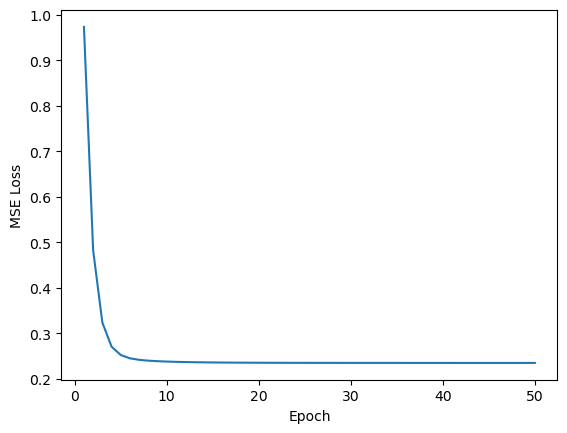

In [13]:
#check convergence of the GD algorithm
plt.plot(range(1, lr.n_iter+1), lr.losses_)
plt.ylabel('MSE Loss')
plt.xlabel('Epoch')
plt.show()

We can see from the learning curve above that the gradient descent algorithm converged after approximately $10$ epochs. We can check how the `LinearRegressionGD` model performed on the training set as well.

In [14]:
#predict the feature set using lr
y_pred_std = lr.predict(X_std)
y_pred_reverted = sc_y.inverse_transform(target_std.reshape(-1, 1))

#print out MSE, MAE, and R^2
mse_gd = mean_squared_error(y, y_pred_reverted)
mae_gd = mean_absolute_error(y, y_pred_reverted)
r2_gd = r2_score(y, y_pred_reverted)
print('MSE: {}'.format(round(mse_gd, 3)))
print('MAE: {}'.format(round(mae_gd, 3)))
print('R^2: {}'.format(round(r2_gd, 3)))

MSE: 1499361116.767
MAE: 25676.606
R^2: 0.765


Finally, we compare both of the methods above to the implementation of linear regression present in the scikit-learn library.

In [15]:
from sklearn.linear_model import LinearRegression

#create sklearn implementation
slr = LinearRegression()
slr.fit(X, y)
y_pred_sk = slr.predict(X)

#print out MSE, MAE, R^2
mse_sk = mean_squared_error(y, y_pred_sk)
mae_sk = mean_absolute_error(y, y_pred_sk)
r2_sk = r2_score(y, y_pred_sk)
print('MSE: {}'.format(round(mse_sk, 3)))
print('MAE: {}'.format(round(mae_sk, 3)))
print('R^2: {}'.format(round(r2_sk, 3)))

MSE: 1499345498.078
MAE: 25689.686
R^2: 0.765
